In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


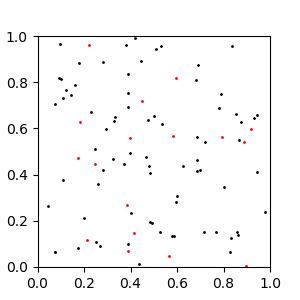

<IPython.core.display.Javascript object>


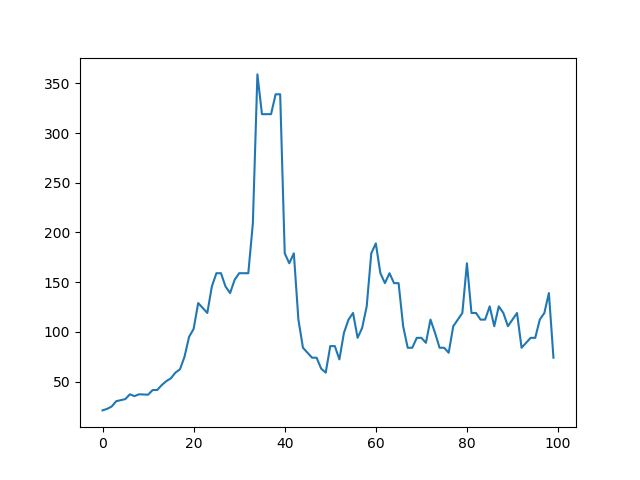

In [11]:
%matplotlib notebook

n_animals = 100
n_steps = 100
vmin=0.01
vmax=0.05
trap_size = 0.4

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals,low=vmin, high=vmax)*(2*np.random.randint(size=n_animals, low=0, high=2)-1)
vy = np.random.uniform(size=n_animals,low=vmin, high=vmax)*(2*np.random.randint(size=n_animals, low=0, high=2)-1)

color = np.where(np.logical_and(x<trap_size, y<trap_size), 1, 0)
estimation = np.zeros(n_steps)
n_marked = np.sum(color)

fig = plt.figure(figsize = (3,3));
plt.xlim(0,1);
plt.ylim(0,1);
#plt.show(); not needed 

for i in range(n_steps): 
    x += vx
    y += vy
    
    vx = np.where(np.logical_or(x>1,x<0), -vx, vx)
    vy = np.where(np.logical_or(y>1,y<0), -vy, vy)
    
    n_recap_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
    n_recap_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color)
    estimation[i] = (n_marked+1)/(n_recap_marked+1)*(n_recap_total+1)-1
                
    plt.cla()
    plt.plot(x[color==0], y[color==0], 'k.', markersize = 2);
    plt.plot(x[color==1], y[color==1],'r.',markersize=2);
    plt.xlim(0,1);
    plt.ylim(0,1);
    fig.canvas.draw();
    time.sleep(0.001)
    
plt.figure()
plt.plot(estimation);
